In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic as log

In [3]:
# Develop filter function that allowa user to assign weights and filter size by him/herself

def filtering_image(img, filterArray=None):
    if filterArray is None:
        filterSize = int(input("Enter filter size: "))
        filterWeights = []
        print("Enter filter weights in row major order")
        for i in range(filterSize):
            filterWeights.extend(list(map(int, input().split())))
        filterWeights = np.array(filterWeights).reshape(filterSize, filterSize)
        log(filterWeights)
    else:
        filterWeights = filterArray
        filterSize = filterWeights.shape[0]
        
    imageHeight, imageWidth = img.shape
    
    # get the padding size
    paddingSize = filterSize // 2
    
    # create a new image with padding
    newImage = np.zeros((imageHeight + paddingSize * 2, imageWidth + paddingSize * 2))
    newImage[paddingSize:paddingSize + imageHeight, paddingSize:paddingSize + imageWidth] = img
    
    # create a new image to store the result
    resultImage = np.zeros((imageHeight, imageWidth))
    for i in range(paddingSize, imageHeight + paddingSize):
        for j in range(paddingSize, imageWidth + paddingSize):
            roi = newImage[i - paddingSize:i + paddingSize + 1, j - paddingSize:j + paddingSize + 1]
            resultImage[i - paddingSize, j - paddingSize] = np.sum(roi * filterWeights)
    return resultImage

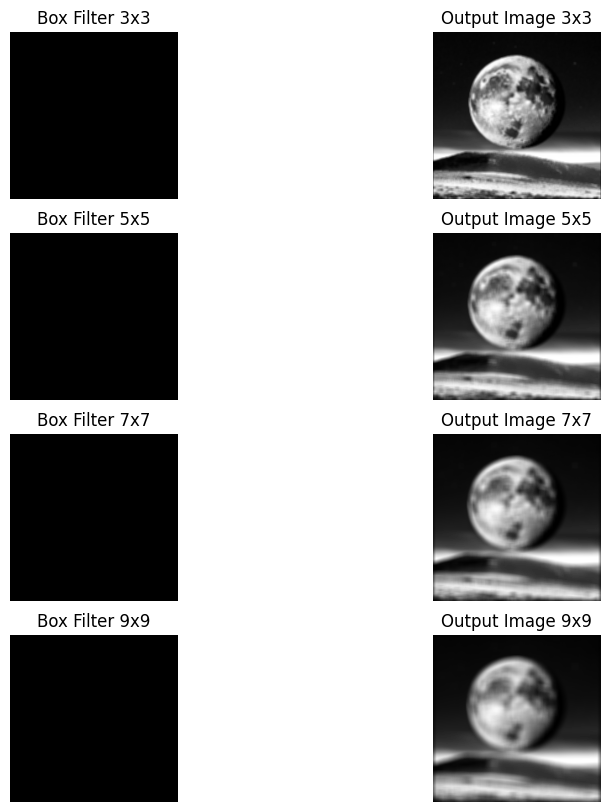

In [7]:
# apply with box filter 3x3, 5x5, 7x7, 9x9
hw1ImagePath = "images/week6/moon.png"
image = cv2.imread(hw1ImagePath, cv2.IMREAD_GRAYSCALE)

# box filter 3x3    
boxFilter3x3 = np.array([[1, 1, 1], 
                         [1, 1, 1], 
                         [1, 1, 1]]) / 9
boxFilter5x5 = np.array([[1, 1, 1, 1, 1],
                         [1, 1, 1, 1, 1],
                         [1, 1, 1, 1, 1],
                         [1, 1, 1, 1, 1],
                         [1, 1, 1, 1, 1]]) / 25
boxFilter7x7 = np.array([[1, 1, 1, 1, 1, 1, 1],
                         [1, 1, 1, 1, 1, 1, 1],
                         [1, 1, 1, 1, 1, 1, 1],
                         [1, 1, 1, 1, 1, 1, 1],
                         [1, 1, 1, 1, 1, 1, 1],
                         [1, 1, 1, 1, 1, 1, 1],
                         [1, 1, 1, 1, 1, 1, 1]]) / 49
boxFilter9x9 = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
                            [1, 1, 1, 1, 1, 1, 1, 1, 1],
                            [1, 1, 1, 1, 1, 1, 1, 1, 1],
                            [1, 1, 1, 1, 1, 1, 1, 1, 1],
                            [1, 1, 1, 1, 1, 1, 1, 1, 1],
                            [1, 1, 1, 1, 1, 1, 1, 1, 1],
                            [1, 1, 1, 1, 1, 1, 1, 1, 1],
                            [1, 1, 1, 1, 1, 1, 1, 1, 1],
                            [1, 1, 1, 1, 1, 1, 1, 1, 1]]) / 81

resultImage3x3 = filtering_image(image, boxFilter3x3)
resultImage5x5 = filtering_image(image, boxFilter5x5)
resultImage7x7 = filtering_image(image, boxFilter7x7)
resultImage9x9 = filtering_image(image, boxFilter9x9)

# RESULT
plt.figure(figsize=(10, 10))
plt.subplot(4, 2, 1)
plt.imshow(boxFilter3x3, cmap='gray')
plt.title('Box Filter 3x3')
plt.axis('off')
plt.subplot(4, 2, 2)
plt.imshow(resultImage3x3, cmap='gray')
plt.title('Output Image 3x3')
plt.axis('off')
plt.subplot(4, 2, 3)
plt.imshow(boxFilter5x5, cmap='gray')
plt.title('Box Filter 5x5')
plt.axis('off')
plt.subplot(4, 2, 4)
plt.imshow(resultImage5x5, cmap='gray')
plt.title('Output Image 5x5')
plt.axis('off')
plt.subplot(4, 2, 5)
plt.imshow(boxFilter7x7, cmap='gray')
plt.title('Box Filter 7x7')
plt.axis('off')
plt.subplot(4, 2, 6)
plt.imshow(resultImage7x7, cmap='gray')
plt.title('Output Image 7x7')
plt.axis('off')
plt.subplot(4, 2, 7)
plt.imshow(boxFilter9x9, cmap='gray')
plt.title('Box Filter 9x9')
plt.axis('off')
plt.subplot(4, 2, 8)
plt.imshow(resultImage9x9, cmap='gray')
plt.title('Output Image 9x9')
plt.axis('off')
plt.show()

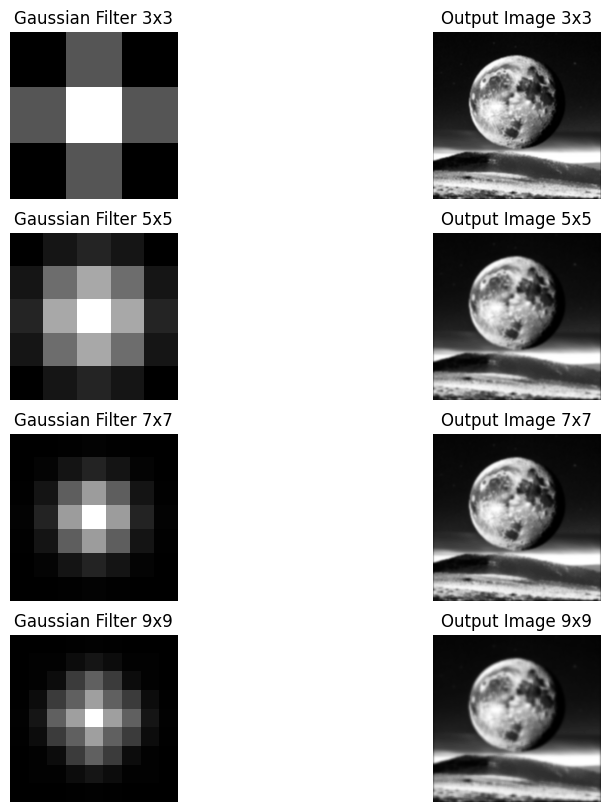

In [ ]:
# apply with gaussian filter 3x3, 5x5, 7x7, 9x9
hw1ImagePath = "images/week6/moon.png"
image = cv2.imread(hw1ImagePath, cv2.IMREAD_GRAYSCALE)

gaussianFilter3x3 = np.array([[1, 2, 1], 
                              [2, 4, 2], 
                              [1, 2, 1]]) / 16
gaussianFilter5x5 = np.array([[1, 4, 6, 4, 1], 
                              [4, 16, 24, 16, 4], 
                              [6, 24, 36, 24, 6], 
                              [4, 16, 24, 16, 4], 
                              [1, 4, 6, 4, 1]]) / 256
gaussianFilter7x7 = np.array([[0, 0, 1, 2, 1, 0, 0], 
                              [0, 3, 13, 22, 13, 3, 0], 
                              [1, 13, 59, 97, 59, 13, 1], 
                              [2, 22, 97, 159, 97, 22, 2], 
                              [1, 13, 59, 97, 59, 13, 1], 
                              [0, 3, 13, 22, 13, 3, 0], 
                              [0, 0, 1, 2, 1, 0, 0]]) / 1003
gaussianFilter9x9 = np.array([[0, 0, 0, 1, 2, 1, 0, 0, 0], 
                              [0, 2, 3, 13, 22, 13, 3, 2, 0], 
                              [0, 3, 13, 59, 97, 59, 13, 3, 0], 
                              [1, 13, 59, 97, 159, 97, 59, 13, 1], 
                              [2, 22, 97, 159, 256, 159, 97, 22, 2], 
                              [1, 13, 59, 97, 159, 97, 59, 13, 1], 
                              [0, 3, 13, 59, 97, 59, 13, 3, 0], 
                              [0, 2, 3, 13, 22, 13, 3, 2, 0], 
                              [0, 0, 0, 1, 2, 1, 0, 0, 0]]) / 1394

resultImageGaussian3x3 = filtering_image(image, gaussianFilter3x3)
resultImageGaussian5x5 = filtering_image(image, gaussianFilter5x5)
resultImageGaussian7x7 = filtering_image(image, gaussianFilter7x7)
resultImageGaussian9x9 = filtering_image(image, gaussianFilter9x9)

# RESULT: plot result with gaussian filter
plt.figure(figsize=(10, 10))
plt.subplot(4, 2, 1)
plt.imshow(gaussianFilter3x3, cmap='gray')
plt.title('Gaussian Filter 3x3')
plt.axis('off')
plt.subplot(4, 2, 2)
plt.imshow(resultImageGaussian3x3, cmap='gray')
plt.title('Output Image 3x3')
plt.axis('off')
plt.subplot(4, 2, 3)
plt.imshow(gaussianFilter5x5, cmap='gray')
plt.title('Gaussian Filter 5x5')
plt.axis('off')
plt.subplot(4, 2, 4)
plt.imshow(resultImageGaussian5x5, cmap='gray')
plt.title('Output Image 5x5')
plt.axis('off')
plt.subplot(4, 2, 5)
plt.imshow(gaussianFilter7x7, cmap='gray')
plt.title('Gaussian Filter 7x7')
plt.axis('off')
plt.subplot(4, 2, 6)
plt.imshow(resultImageGaussian7x7, cmap='gray')
plt.title('Output Image 7x7')
plt.axis('off')
plt.subplot(4, 2, 7)
plt.imshow(gaussianFilter9x9, cmap='gray')
plt.title('Gaussian Filter 9x9')
plt.axis('off')
plt.subplot(4, 2, 8)
plt.imshow(resultImageGaussian9x9, cmap='gray')
plt.title('Output Image 9x9')
plt.axis('off')
plt.show()

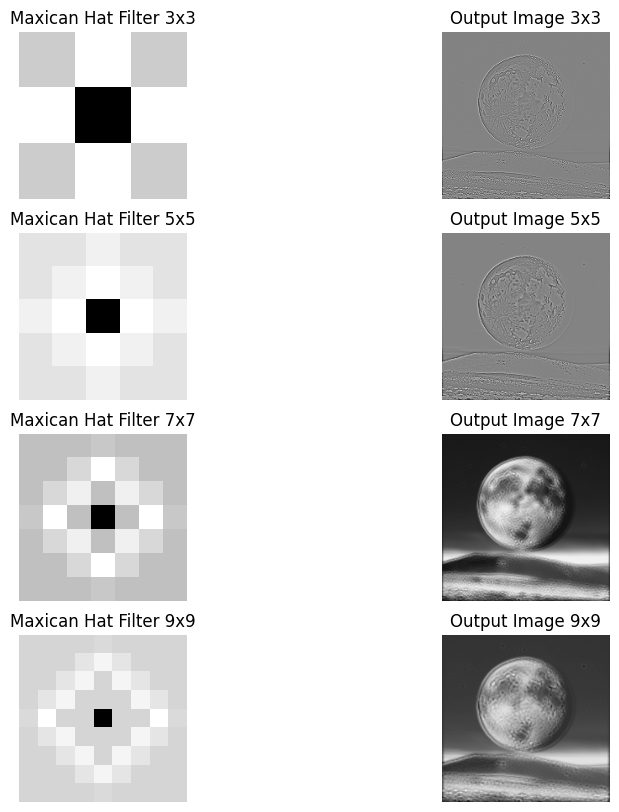

In [ ]:
# apply with mexican hat filter 3x3, 5x5, 7x7, 9x9
hw1ImagePath = "images/week6/moon.png"
image = cv2.imread(hw1ImagePath, cv2.IMREAD_GRAYSCALE)

maxicanHatFilter3x3 = np.array([[0, 1, 0], 
                                [1, -4, 1], 
                                [0, 1, 0]])
maxicanHatFilter5x5 = np.array([[0, 0, 1, 0, 0], 
                                [0, 1, 2, 1, 0], 
                                [1, 2, -16, 2, 1], 
                                [0, 1, 2, 1, 0], 
                                [0, 0, 1, 0, 0]])
maxicanHatFilter7x7 = np.array([[0, 0, 0, 1, 0, 0, 0], 
                                [0, 0, 3, 8, 3, 0, 0], 
                                [0, 3, 6, 0, 6, 3, 0], 
                                [1, 8, 0, -24, 0, 8, 1], 
                                [0, 3, 6, 0, 6, 3, 0], 
                                [0, 0, 3, 8, 3, 0, 0], 
                                [0, 0, 0, 1, 0, 0, 0]])
maxicanHatFilter9x9 = np.array([[0, 0, 0, 0, 1, 0, 0, 0, 0], 
                                [0, 0, 0, 3, 6, 3, 0, 0, 0], 
                                [0, 0, 3, 6, 0, 6, 3, 0, 0], 
                                [0, 3, 6, 0, 0, 0, 6, 3, 0], 
                                [1, 8, 0, 0, -40, 0, 0, 8, 1], 
                                [0, 3, 6, 0, 0, 0, 6, 3, 0], 
                                [0, 0, 3, 6, 0, 6, 3, 0, 0], 
                                [0, 0, 0, 3, 6, 3, 0, 0, 0], 
                                [0, 0, 0, 0, 1, 0, 0, 0, 0]])

resultImageMaxicanHat3x3 = filtering_image(image, maxicanHatFilter3x3)
resultImageMaxicanHat5x5 = filtering_image(image, maxicanHatFilter5x5)
resultImageMaxicanHat7x7 = filtering_image(image, maxicanHatFilter7x7)
resultImageMaxicanHat9x9 = filtering_image(image, maxicanHatFilter9x9)

# RESULT
plt.figure(figsize=(10, 10))
plt.subplot(4, 2, 1)
plt.imshow(maxicanHatFilter3x3, cmap='gray')
plt.title('Maxican Hat Filter 3x3')
plt.axis('off')
plt.subplot(4, 2, 2)
plt.imshow(resultImageMaxicanHat3x3, cmap='gray')
plt.title('Output Image 3x3')
plt.axis('off')
plt.subplot(4, 2, 3)
plt.imshow(maxicanHatFilter5x5, cmap='gray')
plt.title('Maxican Hat Filter 5x5')
plt.axis('off')
plt.subplot(4, 2, 4)
plt.imshow(resultImageMaxicanHat5x5, cmap='gray')
plt.title('Output Image 5x5')
plt.axis('off')
plt.subplot(4, 2, 5)
plt.imshow(maxicanHatFilter7x7, cmap='gray')
plt.title('Maxican Hat Filter 7x7')
plt.axis('off')
plt.subplot(4, 2, 6)
plt.imshow(resultImageMaxicanHat7x7, cmap='gray')
plt.title('Output Image 7x7')
plt.axis('off')
plt.subplot(4, 2, 7)
plt.imshow(maxicanHatFilter9x9, cmap='gray')
plt.title('Maxican Hat Filter 9x9')
plt.axis('off')
plt.subplot(4, 2, 8)
plt.imshow(resultImageMaxicanHat9x9, cmap='gray')
plt.title('Output Image 9x9')
plt.axis('off')
plt.show()

In [ ]:
# Self-study and summarize about How to decompose 2D filter into 1D filters
# Sample 2D filter
sample2DFilter = np.array([
    [0, 0, 1], 
    [0, 0, 1], 
    [0, 0, 0]
])

# check rank of the filter; if rank is 1, we can decompose it into 1D filters
rank = np.linalg.matrix_rank(sample2DFilter)
log(rank)

# decompose 2D filter into 1D filters using Singular Value Decomposition (SVD)
# A = U * S * V^T;
# A: 2D filter
# U: orthogonal eigenvectors of A * A^T
# S: diagonal matrix equal to the square root of the eigenvalues of A * A^T
u, s, vt = np.linalg.svd(sample2DFilter)

u = u[:, :rank]
s = s[:rank]
vt = vt[:rank, :]

# decompose 2D filter into 1D filters
filter1D1 = np.sqrt(s[0]) * u[:, 0]
filter1D2 = np.sqrt(s[0]) * vt[0, :]

reconstructedFilter = np.outer(filter1D1, filter1D2)
log(reconstructedFilter)

ic| rank: np.int64(1)
ic| reconstructedFilter: array([[-0.,  0.,  1.],
                                [-0.,  0.,  1.],
                                [-0.,  0.,  0.]])


array([[-0.,  0.,  1.],
       [-0.,  0.,  1.],
       [-0.,  0.,  0.]])

In [ ]:
def decompose_2d_filter_svd(filter2D):
    rank = np.linalg.matrix_rank(filter2D)
    
    # If rank is not 1, decomposition into 1D filters is not possible
    if rank != 1:
        print("The filter cannot be decomposed into 1D filters as it has rank:", rank)
        return None, None, None
    
    u, s, vt = np.linalg.svd(filter2D)
    u = u[:, :rank]
    s = s[:rank]
    vt = vt[:rank, :]
    
    filter1D1 = np.sqrt(s[0]) * u[:, 0]
    filter1D2 = np.sqrt(s[0]) * vt[0, :]
    
    reconstructedFilter = np.outer(filter1D1, filter1D2)
    
    return filter1D1, filter1D2, reconstructedFilter

In [87]:
# generate a random 2D filter rank 1; 5*5
randomFilter = np.array([
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]
])

filter1D1, filter1D2, reconstructedFilter = decompose_2d_filter_svd(randomFilter)
log(filter1D1)
log(filter1D2)
log(reconstructedFilter)

ic| filter1D1: array([-0.75983569, -0.75983569, -0.75983569,  0.        ,  0.        ])
ic| filter1D2: array([ 0.        ,  0.        , -1.31607401,  0.        ,  0.        ])
ic| reconstructedFilter: array([[-0., -0.,  1., -0., -0.],
                                [-0., -0.,  1., -0., -0.],
                                [-0., -0.,  1., -0., -0.],
                                [ 0.,  0., -0.,  0.,  0.],
                                [ 0.,  0., -0.,  0.,  0.]])


array([[-0., -0.,  1., -0., -0.],
       [-0., -0.,  1., -0., -0.],
       [-0., -0.,  1., -0., -0.],
       [ 0.,  0., -0.,  0.,  0.],
       [ 0.,  0., -0.,  0.,  0.]])

In [ ]:
# HW3: Apply Max, Min, Median, and Weighted Median filters to 2 images and discuss effects of these filters

def filtering_image_max(img, filterSize=3):
    imageHeight, imageWidth = img.shape
    
    paddingSize = filterSize // 2
    newImage = np.zeros((imageHeight + paddingSize * 2, imageWidth + paddingSize * 2))
    newImage[paddingSize:paddingSize + imageHeight, paddingSize:paddingSize + imageWidth] = img
    
    resultImage = np.zeros((imageHeight, imageWidth))
    for i in range(paddingSize, imageHeight + paddingSize):
        for j in range(paddingSize, imageWidth + paddingSize):
            roi = newImage[i - paddingSize:i + paddingSize + 1, j - paddingSize:j + paddingSize + 1]
            resultImage[i - paddingSize, j - paddingSize] = np.max(roi)
    return resultImage

def filtering_image_min(img, filterSize=3):
    imageHeight, imageWidth = img.shape
    
    paddingSize = filterSize // 2
    newImage = np.zeros((imageHeight + paddingSize * 2, imageWidth + paddingSize * 2))
    newImage[paddingSize:paddingSize + imageHeight, paddingSize:paddingSize + imageWidth] = img
    
    resultImage = np.zeros((imageHeight, imageWidth))
    for i in range(paddingSize, imageHeight + paddingSize):
        for j in range(paddingSize, imageWidth + paddingSize):
            roi = newImage[i - paddingSize:i + paddingSize + 1, j - paddingSize:j + paddingSize + 1]
            resultImage[i - paddingSize, j - paddingSize] = np.min(roi)
    return resultImage

def filtering_image_median(img, filterSize=3):
    imageHeight, imageWidth = img.shape
    
    paddingSize = filterSize // 2
    newImage = np.zeros((imageHeight + paddingSize * 2, imageWidth + paddingSize * 2))
    newImage[paddingSize:paddingSize + imageHeight, paddingSize:paddingSize + imageWidth] = img
    
    resultImage = np.zeros((imageHeight, imageWidth))
    for i in range(paddingSize, imageHeight + paddingSize):
        for j in range(paddingSize, imageWidth + paddingSize):
            roi = newImage[i - paddingSize:i + paddingSize + 1, j - paddingSize:j + paddingSize + 1]
            resultImage[i - paddingSize, j - paddingSize] = np.median(roi)
    return resultImage

def filtering_image_weighted_median(img, filterSize=3, weights=None):
    imageHeight, imageWidth = img.shape
    paddingSize = filterSize // 2
    if weights is None:
        weights = np.ones((filterSize, filterSize), dtype=int)
    assert weights.shape == (filterSize, filterSize), "Weights matrix must match filter size"
    
    paddedImage = np.zeros((imageHeight + paddingSize * 2, imageWidth + paddingSize * 2))
    paddedImage[paddingSize:paddingSize + imageHeight, paddingSize:paddingSize + imageWidth] = img
    
    resultImage = np.zeros((imageHeight, imageWidth))
    for i in range(paddingSize, imageHeight + paddingSize):
        for j in range(paddingSize, imageWidth + paddingSize):
            roi = paddedImage[i - paddingSize:i + paddingSize + 1, j - paddingSize:j + paddingSize + 1]
            weighted_values = []
            for k in range(filterSize):
                for l in range(filterSize):
                    weighted_values.extend([roi[k, l]] * weights[k, l])
            resultImage[i - paddingSize, j - paddingSize] = np.median(weighted_values)
    return resultImage

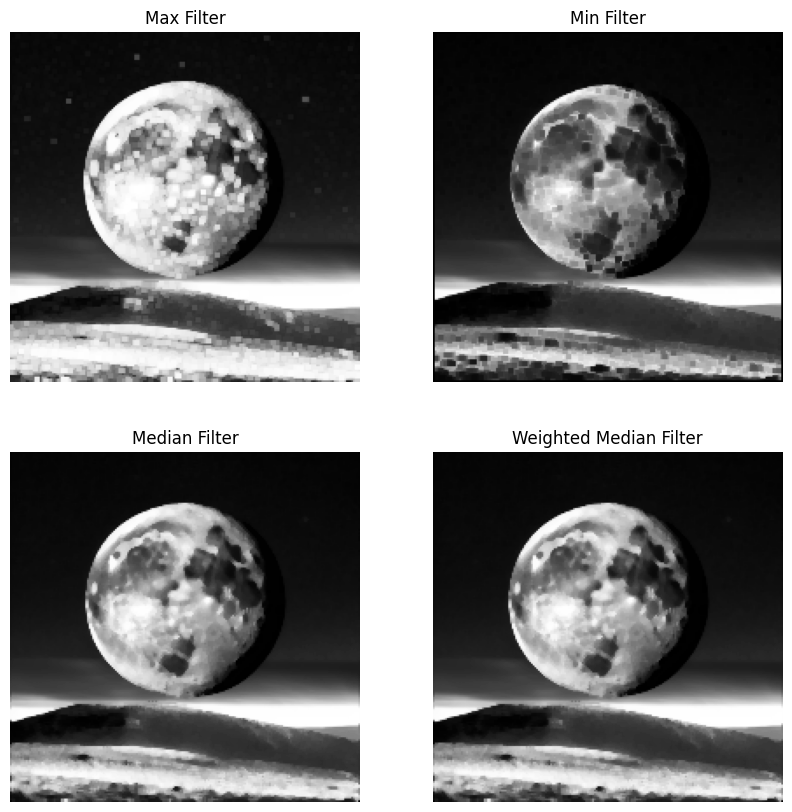

In [13]:
image1 = cv2.imread("images/week6/moon.png", cv2.IMREAD_GRAYSCALE)

resultImageMax = filtering_image_max(image1)
resultImageMin = filtering_image_min(image1)
resultImageMedian = filtering_image_median(image1)
resultImageWeightedMedian = filtering_image_weighted_median(image1)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(resultImageMax, cmap='gray')
plt.title('Max Filter')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(resultImageMin, cmap='gray')
plt.title('Min Filter')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(resultImageMedian, cmap='gray')
plt.title('Median Filter')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(resultImageWeightedMedian, cmap='gray')
plt.title('Weighted Median Filter')
plt.axis('off')
plt.show()

    

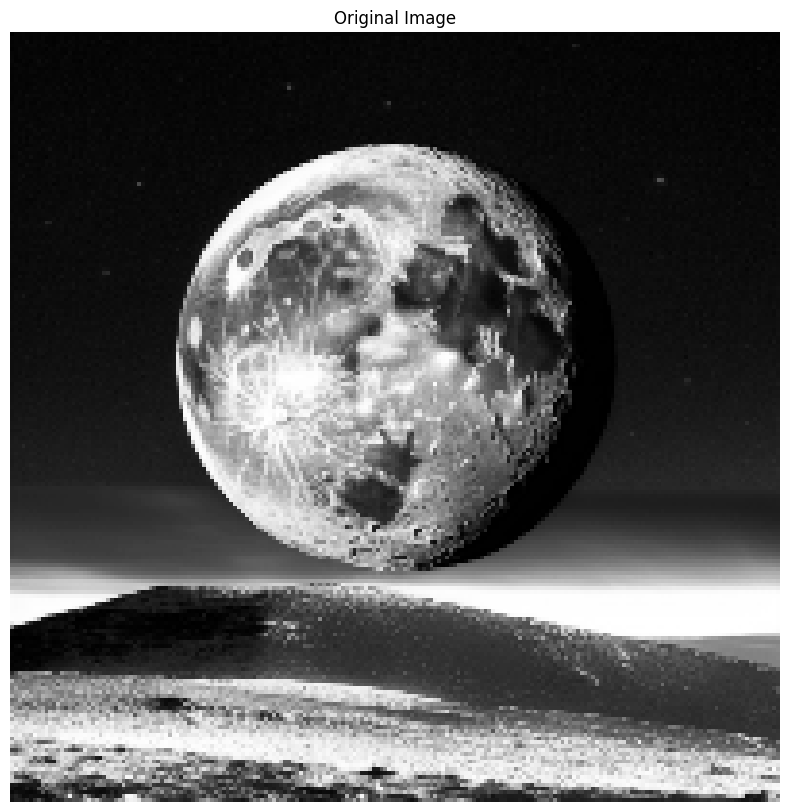

In [17]:
# plot original image
plt.figure(figsize=(10, 10))
plt.imshow(image1, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

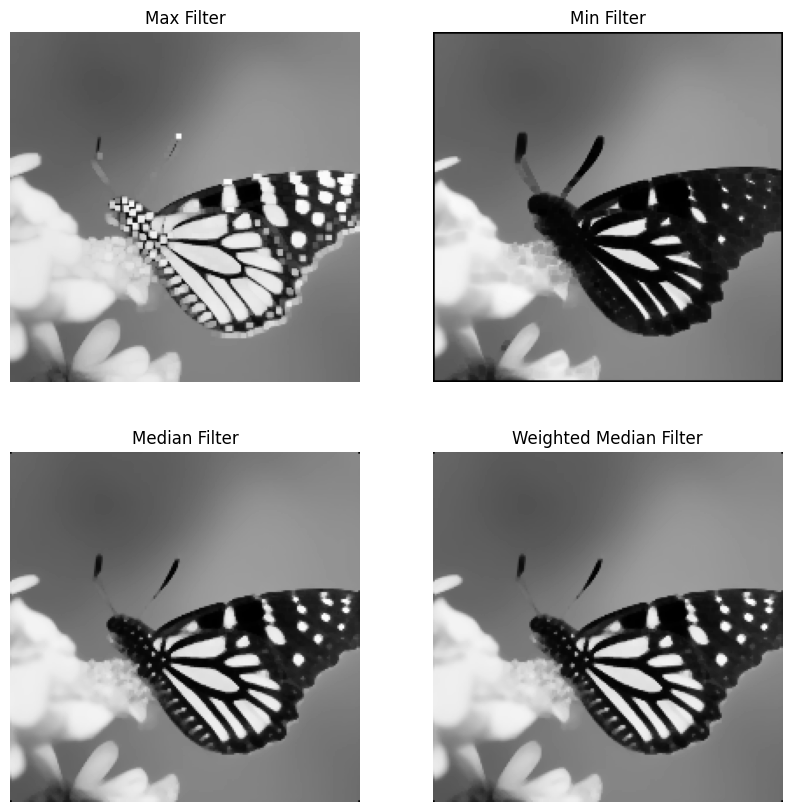

In [15]:
image2 = cv2.imread("images/week6/butterfly.png", cv2.IMREAD_GRAYSCALE)

resultImageMax = filtering_image_max(image2)
resultImageMin = filtering_image_min(image2)
resultImageMedian = filtering_image_median(image2)
resultImageWeightedMedian = filtering_image_weighted_median(image2)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(resultImageMax, cmap='gray')
plt.title('Max Filter')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(resultImageMin, cmap='gray')
plt.title('Min Filter')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(resultImageMedian, cmap='gray')
plt.title('Median Filter')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(resultImageWeightedMedian, cmap='gray')
plt.title('Weighted Median Filter')
plt.axis('off')
plt.show()

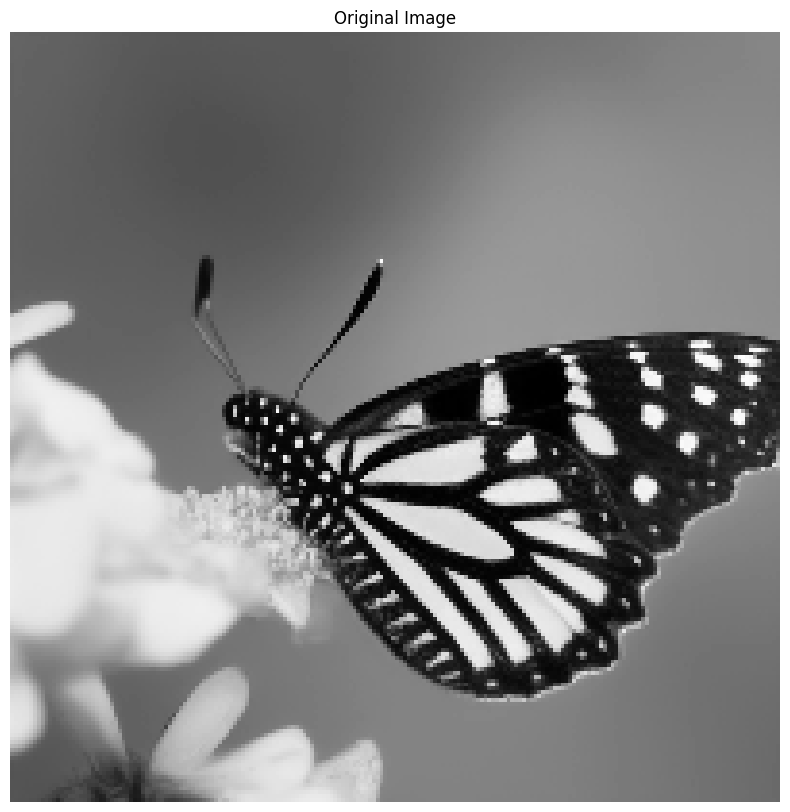

In [18]:
# plot original image
plt.figure(figsize=(10, 10))
plt.imshow(image2, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()